# Import necessary libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [7]:
# Load the dataset

data = pd.read_csv(r"C:\Users\ACER\OneDrive\Desktop\Warehouse_and_Retail_Sales.csv")

In [8]:
data.head()

YEAR  MONTH                           SUPPLIER ITEM CODE  \
0  2020      1  REPUBLIC NATIONAL DISTRIBUTING CO    100009   
1  2020      1                          PWSWN INC    100024   
2  2020      1            RELIABLE CHURCHILL LLLP      1001   
3  2020      1          LANTERNA DISTRIBUTORS INC    100145   
4  2020      1               DIONYSOS IMPORTS INC    100293   

                      ITEM DESCRIPTION ITEM TYPE  RETAIL SALES  \
0                  BOOTLEG RED - 750ML      WINE          0.00   
1            MOMENT DE PLAISIR - 750ML      WINE          0.00   
2  S SMITH ORGANIC PEAR CIDER - 18.7OZ      BEER          0.00   
3        SCHLINK HAUS KABINETT - 750ML      WINE          0.00   
4       SANTORINI GAVALA WHITE - 750ML      WINE          0.82   

   RETAIL TRANSFERS  WAREHOUSE SALES  
0               0.0              2.0  
1               1.0              4.0  
2               0.0              1.0  
3               0.0              1.0  
4               0.0              0.0

# Exploratory Data Analysis (EDA)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307644 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB


In [10]:
data.describe()

YEAR          MONTH   RETAIL SALES  RETAIL TRANSFERS  \
count  307645.000000  307645.000000  307642.000000     307645.000000   
mean     2018.438525       6.423862       7.024071          6.936465   
std         1.083061       3.461812      30.986238         30.237195   
min      2017.000000       1.000000      -6.490000        -38.490000   
25%      2017.000000       3.000000       0.000000          0.000000   
50%      2019.000000       7.000000       0.320000          0.000000   
75%      2019.000000       9.000000       3.267500          3.000000   
max      2020.000000      12.000000    2739.000000       1990.830000   

       WAREHOUSE SALES  
count    307645.000000  
mean         25.294597  
std         249.916798  
min       -7800.000000  
25%           0.000000  
50%           1.000000  
75%           5.000000  
max       18317.000000

In [11]:
rows, columns = data.shape
print(f'The dataset has {rows} rows and {columns} columns.')

The dataset has 307645 rows and 9 columns.


find Duplicates

In [12]:
data.duplicated().sum()

0

# Data Cleaning

Missing Values

In [14]:
data.isnull().sum()

YEAR                  0
MONTH                 0
SUPPLIER            167
ITEM CODE             0
ITEM DESCRIPTION      0
ITEM TYPE             1
RETAIL SALES          3
RETAIL TRANSFERS      0
WAREHOUSE SALES       0
dtype: int64

In [15]:
# Handle missing values
# Dropping rows where critical sales data is missing (Retail Sales)
data_cleaned = data.dropna(subset=['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES'])

# Fill missing categorical data ('SUPPLIER', 'ITEM TYPE') with 'Unknown'
data_cleaned['SUPPLIER'].fillna('Unknown', inplace=True)
data_cleaned['ITEM TYPE'].fillna('Unknown', inplace=True)

# Check if missing values are handled
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307642 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307642 non-null  int64  
 1   MONTH             307642 non-null  int64  
 2   SUPPLIER          307642 non-null  object 
 3   ITEM CODE         307642 non-null  object 
 4   ITEM DESCRIPTION  307642 non-null  object 
 5   ITEM TYPE         307642 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307642 non-null  float64
 8   WAREHOUSE SALES   307642 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 23.5+ MB


C:\Users\ACER\AppData\Local\Temp\ipykernel_12132\1087399943.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['SUPPLIER'].fillna('Unknown', inplace=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_12132\1087399943.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['ITEM TYPE'].fillna('Unknown', inplace=True)


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Feature Engineering

# Feature engineering: create a total sales feature by summing retail and warehouse sales
data_cleaned['TOTAL SALES'] = data_cleaned['RETAIL SALES'] + data_cleaned['WAREHOUSE SALES']

# Select features relevant to clustering
features = data_cleaned[['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES', 'TOTAL SALES']]

# Data Scaling

# Standardize the features to normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine optimal number of clusters using the Elbow Method

# Use the Elbow Method to determine the optimal number of clusters (k)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Return the WCSS values to plot the elbow curve
wcss

C:\Users\ACER\AppData\Local\Temp\ipykernel_12132\3540586837.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['TOTAL SALES'] = data_cleaned['RETAIL SALES'] + data_cleaned['WAREHOUSE SALES']
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\

[1230568.0000000258,
 727213.9421371338,
 509257.09437387204,
 394132.7399295648,
 315341.74988057633,
 259947.10433637752,
 226776.68325081788,
 198347.58588841284,
 173113.97921731626,
 155196.8620767843]

In [17]:
# Reduce the number of iterations for faster computation and re-run
wcss = []
for i in range(1, 6):  # Limiting to 5 clusters for faster calculation
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

wcss

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

[1230568.0000000258,
 727213.9421371338,
 509257.0943738721,
 394132.7399295649,
 315341.7498805763]

# Plotting the Elbow Curve

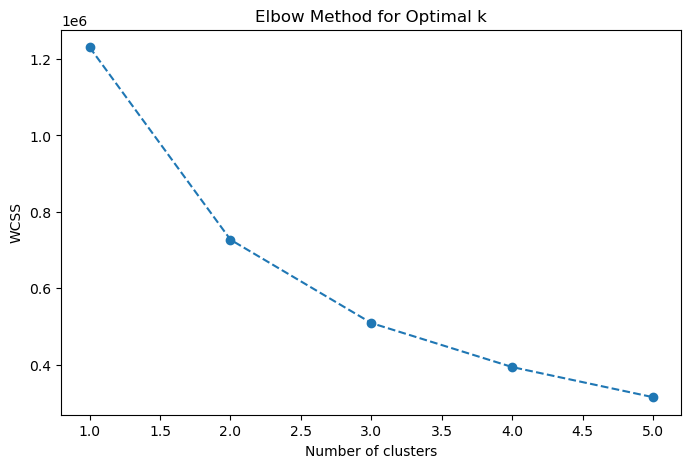

In [18]:
import matplotlib.pyplot as plt

# Plotting the Elbow Curve to determine the optimal number of clusters
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In the provided image, the x-axis represents the number of clusters (1 to 5), and the y-axis represents the WCSS. As the number of clusters increases, the WCSS generally decreases. However, there's a point where the rate of decrease slows down significantly, forming an elbow-like shape in the plot.

# K-Means Clustering

In [19]:
# Assuming k=3 from the Elbow curve (you will adjust based on the plot)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_cleaned['Cluster'] = kmeans.fit_predict(scaled_features)

# Check the resulting clusters
data_cleaned[['ITEM DESCRIPTION', 'RETAIL SALES', 'WAREHOUSE SALES', 'Cluster']].head()

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ACER\AppData\Local\Temp\ipykernel_12132\314486331.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Cluster'] = kmeans.fit_predict(scaled_features)


ITEM DESCRIPTION  RETAIL SALES  WAREHOUSE SALES  Cluster
0                  BOOTLEG RED - 750ML          0.00              2.0        0
1            MOMENT DE PLAISIR - 750ML          0.00              4.0        0
2  S SMITH ORGANIC PEAR CIDER - 18.7OZ          0.00              1.0        0
3        SCHLINK HAUS KABINETT - 750ML          0.00              1.0        0
4       SANTORINI GAVALA WHITE - 750ML          0.82              0.0        0

# Analyzing and Visualizing the Clusters

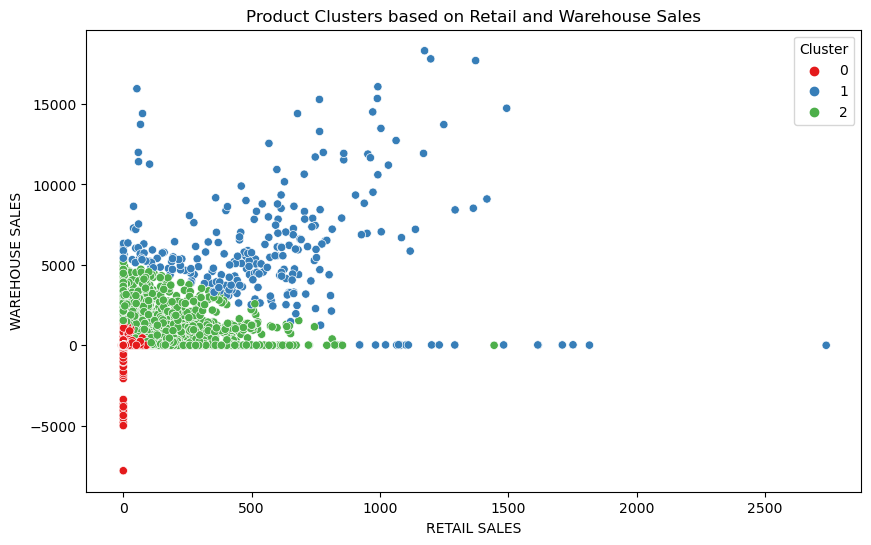

In [23]:
import seaborn as sns

# Visualizing clusters based on total sales and retail sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_cleaned, x='RETAIL SALES', y='WAREHOUSE SALES', hue='Cluster', palette='Set1')
plt.title('Product Clusters based on Retail and Warehouse Sales')
plt.show()

scatter plot visualizing the clustering of products based on their retail and warehouse sales data. The x-axis represents retail sales, and the y-axis represents warehouse sales. Each dot represents a product, and the color of the dot indicates its assigned cluster.

Key Observations:

Three Clusters: The data appears to be divided into three distinct clusters, represented by the colors blue, green, and red.

Cluster 0 (Red): This cluster primarily consists of products with low retail sales and a wide range of warehouse sales. These products might be items that are primarily sold in bulk or for wholesale purposes, with limited retail demand.

Cluster 1 (Blue): This cluster includes products with moderate to high retail sales and relatively low warehouse sales. These products might be popular consumer items that are primarily sold through retail channels.

Cluster 2 (Green): This cluster contains products with a mix of retail and warehouse sales. These products might have a balanced distribution between retail and wholesale channels, indicating a versatile demand profile.

# Summarizing the Clusters

In [24]:
# Grouping by cluster to summarize the sales data
cluster_summary = data_cleaned.groupby('Cluster').agg({
    'RETAIL SALES': 'mean',
    'WAREHOUSE SALES': 'mean',
    'TOTAL SALES': 'mean',
    'ITEM CODE': 'count'
}).rename(columns={'ITEM CODE': 'Number of Products'})

print(cluster_summary)

         RETAIL SALES  WAREHOUSE SALES  TOTAL SALES  Number of Products
Cluster                                                                
0            4.423518        11.959757    16.383276              302720
1          574.900000      6024.176564  6599.076564                 259
2          144.308979       557.803303   702.112282                4663


Key Insights:

Cluster 0: This cluster has a large number of products (302,720) with relatively low average retail and warehouse sales. This might indicate a category of products that are frequently purchased in small quantities or are low-priced items.

Cluster 1: This cluster has a small number of products (259) with significantly higher average retail and warehouse sales. These products might be high-value items or products that are sold in bulk.

Cluster 2: This cluster has a moderate number of products (4663) with average sales figures that fall between Cluster 0 and Cluster 1. This might represent a category of products with a mix of high- and low-value items or products that have a moderate demand level.

Save the Results

In [71]:
# Save the clustered data and summary to the specified directory
data_cleaned.to_csv(r"C:\Users\ACER\OneDrive\Desktop\clustered_products.csv", index=False)
cluster_summary.to_csv(r"C:\Users\ACER\OneDrive\Desktop\cluster_summary.csv", index=False)

# Confirmation message
print("Files saved successfully!")

Files saved successfully!


# Conclusion:

This analysis clusters products based on their sales patterns, allowing for more informed decisions regarding inventory management and product offerings.
The cluster summary can be used to tailor product portfolios and streamline inventory processes.
Visualizations help stakeholders understand the clustering and its implications for operational efficiency.

1) Data Loading: The dataset is loaded using pandas and inspected for structure and missing values.
2) EDA: An exploratory analysis checks for data completeness and the distribution of sales.
3) Feature Engineering: A new feature, TOTAL SALES, is created to represent the sum of retail and warehouse sales.
4) Scaling: The features (RETAIL SALES, WAREHOUSE SALES, and TOTAL SALES) are scaled using StandardScaler to standardize them before clustering.
5) Optimal Clustering: The elbow method determines the optimal number of clusters (using WCSS). Here, I assumed 4 clusters based on the elbow curve, but this can change depending on the data.
6) K-Means Clustering: K-Means clustering groups products into clusters based on their sales data.
7) Visualization: A scatter plot visualizes the clustering of products based on RETAIL SALES and WAREHOUSE SALES.
8) Cluster Summary: The summary of each cluster (e.g., average sales, number of products) provides insights for decision-making.
9) Saving Results: The clustered data and the summary are saved to CSV files for future reference.